In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

## cv2.minAreaRect

函数 cv2.minAreaRect() 返回一个Box2D结构 rect：（最小外接矩形的中心（x，y），（宽度，高度），旋转角度）

cv2.boxPoints(rect)  获取最小外接矩形的4个顶点

[minAreaRect](https://blog.csdn.net/lanyuelvyun/article/details/76614872)

In [2]:
import colorsys
import random
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors
colors=random_colors(10)

In [18]:
import cv2
import numpy as np
poly=np.array([
        [ 50, 60],
        [ 70,  45],
        [ 40,  10],
        [  20.5,   10],
[  30, 50]], dtype=np.float32)

poly=np.array([[130.625 ,  114.6875 ],
 [140.78125 ,116.25   ],
 [140.9375  ,119.0625 ],
 [130.78125 ,117.65625]])
rect=cv2.minAreaRect(poly)
box=cv2.boxPoints(rect)

error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\imgproc\src\convhull.cpp:137: error: (-215) total >= 0 && (depth == 5 || depth == 4) in function cv::convexHull


In [23]:
import matplotlib.pyplot as plt
from matplotlib import patches
def show_polys(poly):
    plt.figure(figsize=(8,8))
    ax=plt.subplot(1,1,1)
    max_y=np.max(poly[:,1])
    max_x=np.max(poly[:,0])
    ax.set_ylim(max_y,-10)
    ax.set_xlim(-10, max_x)
    ax.add_patch(patches.Polygon(poly,facecolor='none',edgecolor=colors[np.random.randint(10)]))
    plt.show()

In [17]:
poly,rect,box

(array([[130.625  , 114.6875 ],
        [140.78125, 116.25   ],
        [140.9375 , 119.0625 ],
        [130.78125, 117.65625]], dtype=float32),
 ((135.78125, 116.87499237060547),
  (2.919264793395996, 10.81509017944336),
  -82.11685943603516),
 array([[140.9375  , 119.06249 ],
        [130.22461 , 117.57917 ],
        [130.625   , 114.68749 ],
        [141.33789 , 116.170815]], dtype=float32))

In [125]:
box,list(box),box.copy()

(array([[44.470585  , 66.88235   ],
        [ 6.000001  , 22.        ],
        [31.529415  ,  0.11764526],
        [70.        , 44.999992  ]], dtype=float32),
 [array([44.470585, 66.88235 ], dtype=float32),
  array([ 6.000001, 22.      ], dtype=float32),
  array([31.529415  ,  0.11764526], dtype=float32),
  array([70.      , 44.999992], dtype=float32)],
 array([[44.470585  , 66.88235   ],
        [ 6.000001  , 22.        ],
        [31.529415  ,  0.11764526],
        [70.        , 44.999992  ]], dtype=float32))

In [ ]:
(array([[30., 50.],
        [50., 60.],
        [70., 45.],
        [40., 10.],
        [20., 10.]], dtype=float32),
 ((38.0, 33.499996185302734),
  (33.62422180175781, 59.11354446411133),
  -40.601295471191406))

In [ ]:
array([[44.470585  , 66.88235   ],
       [ 6.000001  , 22.        ],
       [31.529415  ,  0.11764526],
       [70.        , 44.999992  ]], dtype=float32)

## 点到直线距离


In [76]:
def point_dist_to_line(p1, p2, p3):
    # compute the distance from p3 to p1-p2
    return np.linalg.norm(np.cross(p1 - p3, p2 - p3)) / np.linalg.norm(p2 - p1)

In [77]:
p1=np.array([58.64624, 66.27392   ])
p2=np.array([72.5 ,    65.00001        ])
p3=np.array([67, 62])
point_dist_to_line(p1,p2,p3)

3.4910293083941175

In [79]:
np.linalg.norm(np.cross(p1-p3,p2-p3))

48.56792353760005

In [64]:
np.linalg.norm(np.cross(p2 - p3, p1 - p3))

993.8236216516697

In [97]:
np.linalg.norm(np.cross(p2 - p1, p1 - p3))

993.8236216516697

In [98]:
np.linalg.norm(np.cross(p2 - p1, p2 - p3))

993.8236216516697

In [100]:
np.linalg.norm(np.array([1,1,1]))

1.7320508075688772

In [101]:
np.cross(p2 - p3, p1 - p3)

array(993.82362165)

## p1向p2移动

In [19]:
def point_shift_on_line(p1, p2, dist_shift):
    """
    p1向p2移动指定距离的点
    :param p1: 直线的第一个端点
    :param p2: 直线的第二个端点
    :param dist_shift: 相对于第一个点的位移距离
    :return: 目标点
    """
    # 直线距离
    dist_line = np.linalg.norm(p1 - p2)
    # 按两端点按比例相加，就是目标点
    point = p1 + (p2 - p1) * dist_shift / dist_line
    return point

In [29]:
def point_shift_on_line2(p1, p2, dist_shift):
    """
    p1向p2移动指定距离的点
    :param p1: 直线的第一个端点
    :param p2: 直线的第二个端点
    :param dist_shift: 相对于第一个点的位移距离
    :return: 目标点
    """
    # 直线距离
    dist_line = np.linalg.norm(p1 - p2)
    # 按比例相加，就是目标点
    point = (p2 * dist_shift+p1*(dist_line-dist_shift)) / dist_line
    return point

In [23]:
p1=np.array([1,1])
p2=np.array([2,2])
p3=point_shift_on_line(p1,p2,-6)
p3

array([-3.24264069, -3.24264069])

In [26]:
p4=point_shift_on_line(p2,p1,0.1)
p4

array([1.92928932, 1.92928932])

In [48]:
d=6
x=point_shift_on_line(p2,p1,d)
y=point_shift_on_line2(p2,p1,d)
x==y,x,y

(array([False, False]),
 array([-2.24264069, -2.24264069]),
 array([-2.24264069, -2.24264069]))

## 两条直线交点

In [66]:
def fit_line(p1, p2):
    """
    拟合直线
    :param p1: [x,y]
    :param p2: [x,y]
    :return: 拟合方程系数
    """
    x = [p1[0], p2[0]]
    y = [p1[1], p2[1]]
    # 拟合直线 ax+by+c = 0
    if x[0] == x[1]:
        return [1., 0., -x[0]]
    else:
        [a, c] = np.polyfit(x, y, deg=1)  # b=-1
        return [a, -1., c]

## 过某点直线的垂线

In [69]:
def vertical_line(p1, p2, p3):
    """
    过点p3,与直线p1,p2垂直的线
    互相垂直的线，斜率互为互倒数
    :param p1: [x,y]
    :param p2: [x,y]
    :param p3: [x,y]
    :return: 新方程的系数[na,nb,nc]
    """
    line = fit_line(p1, p2)
    a, b, c = line  # ax+by+c=0;一般b为-1
    # 以下获取垂线的系数na,nb,nc
    if a == 0.:  # 原方程为y=c ;新方程为x=-nc
        na = 1.
        nb = 0.
    elif b == 0.:  # 原方程为x=-c;新方程为y=nc
        na = 0.
        nb = -1.
    else:  # 斜率互为互倒数 a*na=-1;
        na = -1. / a
        nb = -1.
    # 根据ax+by+c=0求解系数c
    nc = -(na * p3[0] + nb * p3[1])
    return [na, nb, nc]

[0.9999999999999996, -1.0, 6.2803698347351e-16]

## 饶原点旋转

In [103]:

def rotate(point, angle):
    """
    饶原点旋转
    x′=xcosθ−ysinθ
    y′=xsinθ+ycosθ
    :param point:
    :param angle: 旋转角度
    :return: 旋转后的坐标
    """
    x, y = point
    new_x = x * np.cos(angle) - y * np.sin(angle)
    new_y = x * np.sin(angle) + y * np.cos(angle)
    return np.array([new_x, new_y])

points=np.array([[-1,-1],[2,-1],[2,1],[-1,1]],np.float32)

In [107]:
def elem_cycle_shift(elements, shift):
    """
    将元素位移指定长度;
    如：elements=[1,2,3,4] shift=1 则返回[2,3,4,1]
                       shift=2 则返回[3,4,1,2]
                       shift=-1 则返回[4,1,2,3]
                       shift > 0 左移，反之，右移
    :param elements: 元素列表list of elem
    :param shift: 位移长度
    :return:
    """
    length = len(elements)
    return [elements[(i + shift) % length] for i in range(length)]

array([[-1.3570081 , -0.39815702],
       [ 1.27573959, -1.83643364],
       [ 2.23459066, -0.08126852],
       [-0.39815702,  1.3570081 ]])

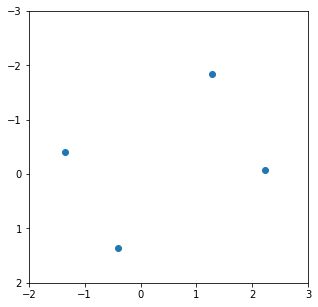

In [106]:
new_p=[rotate(p,-0.5) for p in points]
new_p=np.asarray(new_p)
plt.figure(figsize=(5,5))
ax=plt.subplot(1,1,1)
ax.set_ylim(2,-3)
ax.set_xlim(-2,3)
plt.scatter(new_p[:,0],new_p[:,1])
new_p

array([[-0.69605936, -1.23105701],
       [ 2.1946152 , -0.42856053],
       [ 1.65961754,  1.49855584],
       [-1.23105701,  0.69605936]])

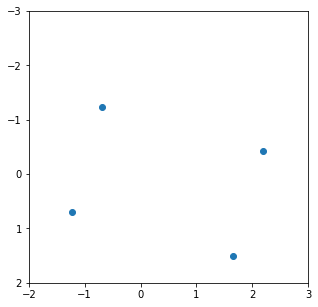

In [110]:
angle=1.3
new_p=[rotate(p,-np.pi/2) for p in points]
new_p=np.asarray(new_p)
new_p=[rotate(p,np.pi-angle) for p in new_p]
new_p=np.asarray(new_p)
new_p
plt.figure(figsize=(5,5))
ax=plt.subplot(1,1,1)
ax.set_ylim(2,-3)
ax.set_xlim(-2,3)
plt.scatter(new_p[:,0],new_p[:,1])
new_p

array([[-1.23105701,  0.69605936],
       [-0.42856053, -2.1946152 ],
       [ 1.49855584, -1.65961754],
       [ 0.69605936,  1.23105701]])

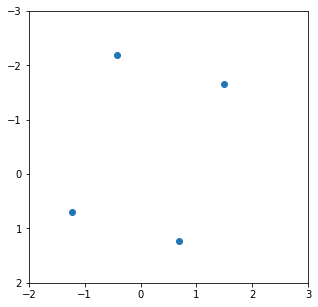

In [112]:
new_p=[rotate(p,-angle) for p in points]
new_p=np.asarray(new_p)
plt.figure(figsize=(5,5))
ax=plt.subplot(1,1,1)
ax.set_ylim(2,-3)
ax.set_xlim(-2,3)
plt.scatter(new_p[:,0],new_p[:,1])
new_p

## cv2.fillPoly

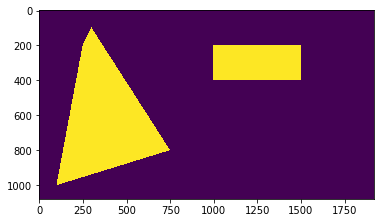

In [60]:
img = np.zeros((1080, 1920), np.uint8)
area1 = np.array([[250, 200], [300, 100], [750, 800], [100, 1000]])
area2 = np.array([[1000, 200], [1500, 200], [1500, 400], [1000, 400]])
 
cv2.fillPoly(img, [area1, area2], 255)  # 必须是列表
 
plt.imshow(img)
plt.show()

In [61]:
cv2.fillPoly(img, area1, 255)  # 必须是列表


error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2407: error: (-215) p.checkVector(2, 4) >= 0 in function cv::fillPoly


## shrink_polygon

In [32]:
def point_shift_on_line(p1, p2, dist_shift):
    """
    p1向p2移动指定距离的点
    :param p1: 直线的第一个端点
    :param p2: 直线的第二个端点
    :param dist_shift: 相对于第一个点的位移距离
    :return: 目标点
    """
    # 直线距离
    dist_line = np.linalg.norm(p1 - p2)
    # 按比例相加，就是目标点
    point = p1 + (p2 - p1) * dist_shift / dist_line
    return point

def shrink_poly_edge(poly, rs, edge_index):
    """
    内缩四边形的某一条边
    :param poly: [4,(xi,yi)] i<4,第一个点为左上，顺时针排列
    :param rs: 每个顶点的R距离，R距离为顶点的短边距离
    :param edge_index: 需要内缩的边索引号
    :return:
    """
    # 边对应的两个顶点索引号
    idx1, idx2 = edge_index, (edge_index + 1) % 4
    # 边对应的两个顶点
    p1, p2 = poly[idx1], poly[idx2]
    # 顶点对应的r
    r1, r2 = rs[idx1], rs[idx2]
    # 两边内缩
    poly[idx1] = point_shift_on_line(p1, p2, r1 * 0.3)
    poly[idx2] = point_shift_on_line(p2, p1, r2 * 0.3)

def shrink_polygon(poly):
    """
    内缩四边形
    :param poly: [4,(xi,yi)] i<4,第一个点为左上，顺时针排列
    :return:
    """
    # top,right,bottom,left四边的距离
    dist_edges = [np.linalg.norm(poly[i] - poly[(i + 1) % 4]) for i in range(4)]
    # lt,rt,rb,lb四个顶点的ri值，ri为顶点相邻两边的短边长度
    rs = [min(dist_edges[i], dist_edges[(i + 3) % 4]) for i in range(4)]

    # 先缩长边再缩短边;对边确定长边
    if dist_edges[0] + dist_edges[2] > dist_edges[1] + dist_edges[3]:
        # 长边
        shrink_poly_edge(poly, rs, 0)
        shrink_poly_edge(poly, rs, 2)
        # 短边
        shrink_poly_edge(poly, rs, 1)
        shrink_poly_edge(poly, rs, 3)
    else:
        # 长边
        shrink_poly_edge(poly, rs, 1)
        shrink_poly_edge(poly, rs, 3)
        # 短边
        shrink_poly_edge(poly, rs, 0)
        shrink_poly_edge(poly, rs, 2)
    return poly



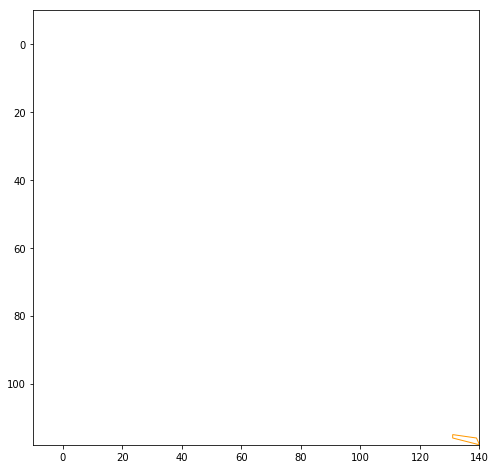

In [51]:
poly=np.array([
        [ 50, 60],
        [ 70,  45],
        [ 60,  10],
        [  20.5,   10]], dtype=np.float32)
poly=np.array([[131, 115],
 [139, 116],
 [140, 118],
 [131 ,116]])
show_polys(poly)


d:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


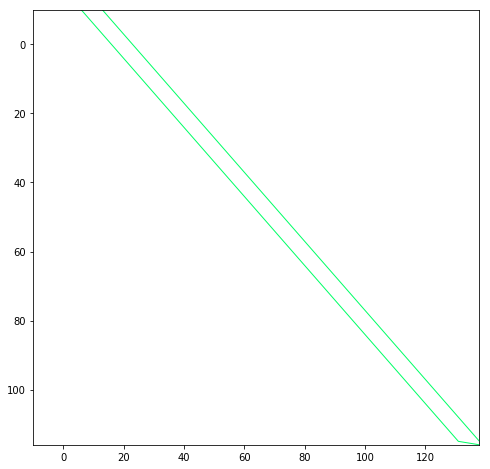

In [47]:
shink_poly=shrink_polygon(poly)
show_polys(shink_poly)

In [59]:
#cv2.fillPoly(np.zeros((500,500,3)),[shink_poly.astype(np.int32)], 11+1)
poly
img=np.zeros((200,200),np.uint8)
cv2.fillPoly(img,poly.astype(np.int32), 1+1)

error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2407: error: (-215) p.checkVector(2, 4) >= 0 in function cv::fillPoly


In [50]:
shink_poly

array([[-2147483648, -2147483648],
       [        138,         115],
       [        138,         116],
       [        131,         115]])

In [24]:
d=dict(enumerate(indices))
d[1]

63

In [26]:
import keras
x=np.random.randn(3,10)
keras.utils.np_utils.normalize(x)

array([[ 0.20550491,  0.30939501,  0.07872518, -0.39141341, -0.28451382,
        -0.48722777, -0.28600678,  0.2120979 , -0.01792871, -0.50714347],
       [-0.4211049 ,  0.24483196,  0.13176833, -0.15748922,  0.38168553,
         0.6404108 ,  0.3352909 , -0.20148743,  0.00652097,  0.10813277],
       [ 0.20280041,  0.59457096,  0.08124696,  0.05776292, -0.28184969,
         0.51379575, -0.14753363,  0.21702895, -0.38511215, -0.18658863]])

In [30]:
keras.utils.np_utils.normalize(np.mean(x,axis=0))

array([[-0.03097932,  0.6996381 ,  0.18667619, -0.34411591, -0.09274955,
         0.37221164, -0.05212543,  0.12860396, -0.21664815, -0.37808281]])

In [31]:
np.mean(x,axis=0)

array([-0.04084888,  0.92253242,  0.24614845, -0.45374613, -0.12229818,
        0.49079275, -0.06873182,  0.16957528, -0.28566904, -0.49853439])

In [78]:
np.random.choice(5)

4

In [81]:
a=set([1,3])
a.add(4)
if 1 in a:
    print('yes')
a

yes


{1, 3, 4}

In [88]:
[a for a,b in [['a','b'],['a','b'],['a','b']]]

['a', 'a', 'a']

In [3]:
x=np.arange(5)
y=np.arange(5)
for a,b in zip (x,y):
    print(a,b)

0 0
1 1
2 2
3 3
4 4


In [4]:
a=np.ones(shape=(5,6,4))
b=np.tile(a,(3,1,1,1))
b.shape

(3, 5, 6, 4)

In [32]:
np.random.randint(5)

2

In [3]:
a=[]
for x in a:
    print(x)

In [7]:
import numpy as np
np.arange(3,5)

array([3, 4])

In [1]:
x='gt_img_3.txt'
x[3:-3]

'img_3.'

In [2]:
3**3 *2

54

In [3]:
2*3**3

54

In [84]:
720/16

45.0